# Dimensionality Reduction Algorithms

**For more details:**
- [PCA, SVD](https://www.youtube.com/watch?v=F-nfsSq42ow)
- [6 Dimensionality Reduction Algorithms With Python](https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/)
- [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [Principal Component Analysis (1/2)](https://machinelearningcoban.com/2017/06/15/pca/)
- [Principal Component Analysis (2/2)](https://machinelearningcoban.com/2017/06/21/pca2/)

In [1]:
from sklearn.decomposition import PCA

import numpy as np
np.random.seed(42)

import os
import pandas as pd
import matplotlib.pyplot as plt

### Load data 

In [2]:
# filename structure
path = '../datasets/Yale Face Database/' # path to the database
prefix = 'subject'
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ]

In [3]:
filenames = list(f for f in os.listdir(path) if prefix in f)

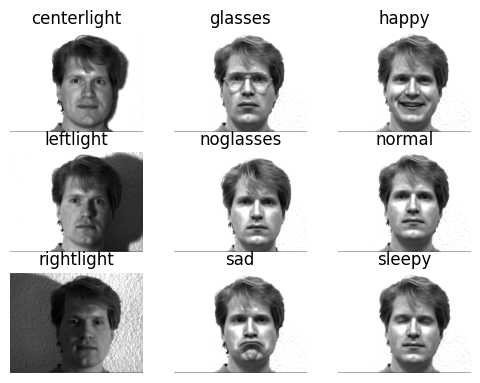

In [4]:
plt.figure(figsize=(6, 6))
for i in range(9):
    ax = plt.subplot(4, 3, i + 1)
    ax.set_axis_off()

    plt.imshow(plt.imread(path + filenames[i]),cmap="gray")
    plt.title(filenames[i].split(".")[1])

### Reduce data dimensionality using PCA

In [5]:
# data dimension
h = 243 # height
w = 320 # width
D = h * w
N = len(states)*15
K = 100

# collect all data
X = np.zeros((D, N))

for idx, filename in enumerate(filenames):
    fn = path + filename
    X[:, idx] = plt.imread(fn).reshape(D)

# Doing PCA, note that each row is a datapoint

# pca = PCA(n_components=100) # K = 100
pca = PCA(n_components=0.99) # r = 0.99
pca.fit(X.T)

# projection matrix
U = pca.components_.T


In [6]:
print("X.shape:", X.shape)
print("U.shape:", U.shape)

X.shape: (77760, 165)
U.shape: (77760, 106)


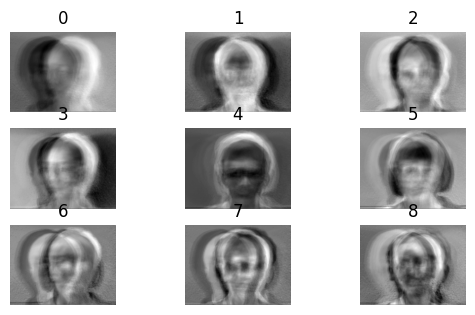

In [7]:
for i in range(9):
    ax = plt.subplot(4, 3, i + 1)
    ax.set_axis_off()

    plt.imshow(U[:,i].reshape((243,320)),cmap="gray")
    plt.title(i)